In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
from sklearn import preprocessing

import pingouin as pg
import researchpy   
%matplotlib inline

In [4]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
le = preprocessing.LabelEncoder()
df_train['Survived']=le.fit_transform(df_train['Survived'])
df_train = df_train.rename(columns = {'Survived':'Survived_cate'})
df_train

,PassengerId,Survived_cate,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
# 屬於連續 vs 離散，利用變異數分析
aov = pg.anova(dv='Age', between='Survived_cate', data=df_train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [11]:
# 看變異數影響比例
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

In [12]:
# 利用自製函示判斷相關性強度，可以得出相關性低
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Negligible'

In [14]:
# Q2:透過數值法計算 Sex 和 Survived 是否有相關性?
# 屬於離散 vs 離散
# 先利用交叉表
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
contTable

Survived_cate,0,1
Sex,,
female,81,233
male,468,109


In [15]:
# 計算自由度
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [17]:
import researchpy   
crosstab, res = researchpy.crosstab(df_train['Sex'], df_train['Survived_cate'], test='chi-square')
print(res)
# 由結果可知，cramer's phi = 0.5434，呈現高度相關

                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434


In [22]:
# Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
# 屬於連續 vs 連續，直接計算相關係數
df_train.isnull().any()
# df_train.info()
# 將缺失值去除
df_train = df_train[['Age','Fare']]].dropna()
corr,pvalue=stats.pearsonr(df_train['Age'], df_train['Fare'])
print(corr)

-0.09242385620999947


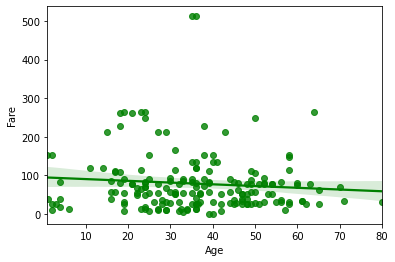

In [23]:
g = sns.regplot(x="Age", y="Fare", color="g",data=df_train)
# 年齡與費率呈現低度負相關